<h1><center><font size=10 color="green">Project 9 - Twitter US Airline Sentiment</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

# 1. Given Problem Statement


<h1><b><font size=3>Context</font></b></h1>

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

<h1><b><font size=3>Objective</font></b></h1>

Implement NLP model for sentiment analysis of the dataset. Analysis involves considering text field and resulting sentiment, irrespetive of the airline it pertains to.

<h1><b><font size=3>Data Description</font></b></h1>

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


Dataset:

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone

# 2. Frame Problem

The goal of this project is to use the text information from tweets and build a classification model for Sentiment Analysis. 
Purpose is to predict the customer sentiments, if they are Positive, Negative or Neutral. 

This is a Multi-Class Classification problem. 
Independent feature in this case is text field. Dependent feature in this case is the label airline_sentiment.

We will create Random Forest classification model using Count Vectorizer and TF-IDF Vectorizer.

# 3. Identify Model Evaluation Metrics

Classification model should be able to predict the customer sentiment accurately. 
We will choose <b><font color="blue">ACCURACY</b></font> as the evaluation metric.
Accuracy: Accuracy is calculated as the total number of correct predictions (TP + TN) divided by the total number of a dataset (P + N).
      
      ACC = TP + TN / ( TP+TN+FP+FN)

We will want to predict correctly. All classes are equally important. Hence we will use ACCURACY as our primary metric. F1-Score will be used as a secondary metric, that balances False Positives as well as False Negatives.

Other Metrics - For reference, we will also report Recall and Precsion as well.

# 4. Reusable Custom Functions

Any reusable functions for the project. There are none created for this project.

# 5. Import Required libraries

In [1]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install xgboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import libraries, comment out ones that are not needed for this project

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black#

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# # To split the data into train and test
from sklearn.model_selection import train_test_split

# # To build linear regression_model
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso

# To check model performance for Linear Regression
#from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# To be used for data scaling and one hot encoding
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# from scipy.stats import zscore

# # For boxcox
# from scipy.stats import boxcox 
# from sklearn.preprocessing import PowerTransformer

# # To build Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# # To build Logistic Regression
from sklearn.linear_model import LogisticRegression

# # For Decision Tree Hyperparameter Tuning, Pre-pruning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# # Import Metrics
from sklearn import metrics

# # To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    r2_score
)

# # For Ensemble Techniques

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
# #To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

# # Importing Simple Imputer to treat the null values
# from sklearn.impute import SimpleImputer

# # for imbalanced data, to undersample and oversample the data
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # to create k folds of data and get cross validation score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report         # Import Classification report

# # To do one-hot encoding
# from sklearn.preprocessing import OneHotEncoder

# # To be used for creating pipelines and personalizing them
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer

# For Clustering,to compute distances
# from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
# from sklearn.decomposition import PCA

# importing different functions to build Neural Network models

# import tensorflow as tf
# import keras_tuner as keras_tuner
# from tensorflow.keras.models import Sequential, Model

# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU, SpatialDropout2D

# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# import random

# from tensorflow.keras import backend
# from tensorflow import keras
# from keras_tuner.tuners import RandomSearch

# from tensorflow.keras import losses, optimizers
# from tensorflow.keras.optimizers import Adam,SGD
# from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Importing all the required sub-modules from Keras
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing.image import ImageDataGenerator

# # Display images using OpenCV
# import cv2
# from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# For NLP

import re, string, unicodedata                          # Import Regex, string and unicodedata.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import nltk                                             # Import Natural Language Tool-Kit.
nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from textblob import TextBlob
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
import contractions                                     # Import contractions library.

In [5]:
#prevent SettingWithCopyWarning message from appearing
# had to be used as Jupyter notebook execution showed warnings that are not seen in Google Colab

pd.options.mode.chained_assignment = None

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 6. Import Dataset 

In [6]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Import dataset as-is

#This line was used with Google Colab
df=pd.read_csv('/content/drive/My Drive/AI-ML/Module9_NLP/PROJECT_9/Tweets.csv')

# Save a separate copy as original, this copy wil not be used and retained for reference only

df_original=df.copy()

In [8]:
# Check sample records

df.sample(10,random_state=1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8515,568198336651649027,positive,1.0000,NaN,NaN,Delta,NaN,GenuineJack,NaN,0,@JetBlue I'll pass along the advice. You guys ...,NaN,2015-02-18 16:00:14 -0800,Massachusetts,Central Time (US & Canada)
3439,568438094652956673,negative,0.7036,Lost Luggage,0.7036,United,NaN,vina_love,NaN,0,@united I sent you a dm with my file reference...,NaN,2015-02-19 07:52:57 -0800,ny,Quito
6439,567858373527470080,positive,1.0000,NaN,NaN,Southwest,NaN,Capt_Smirk,NaN,0,@SouthwestAir Black History Commercial is real...,NaN,2015-02-17 17:29:21 -0800,La Florida,Eastern Time (US & Canada)
5112,569336871853170688,negative,1.0000,Late Flight,1.0000,Southwest,NaN,scoobydoo9749,NaN,0,@SouthwestAir why am I still in Baltimore?! @d...,"[39.1848041, -76.6787131]",2015-02-21 19:24:22 -0800,"Tallahassee, FL",America/Chicago
5645,568839199773732864,positive,0.6832,NaN,NaN,Southwest,NaN,laurafall,NaN,0,@SouthwestAir SEA to DEN. South Sound Volleyba...,NaN,2015-02-20 10:26:48 -0800,NaN,Pacific Time (US & Canada)
1380,569748884164988929,negative,1.0000,Flight Attendant Complaints,0.6818,United,NaN,JacquieMae08,NaN,1,@united One of your workers refused to give me...,NaN,2015-02-22 22:41:34 -0800,SD || CA,Arizona
12674,570066226233417728,negative,1.0000,Bad Flight,0.6966,American,NaN,lczand,NaN,0,@AmericanAir seats that were assigned are inap...,NaN,2015-02-23 19:42:34 -0800,SE USA,Central Time (US & Canada)
13475,569853969469734912,negative,1.0000,Customer Service Issue,0.3642,American,NaN,Davitossss,NaN,0,@AmericanAir now you change my gate and don't ...,NaN,2015-02-23 05:39:08 -0800,NaN,NaN
9630,569771270839013376,negative,1.0000,Late Flight,1.0000,US Airways,NaN,jakenemmasmom,NaN,0,@USAirways What a mess caused by the computer ...,NaN,2015-02-23 00:10:31 -0800,NaN,NaN
3745,568157451729526784,negative,1.0000,Customer Service Issue,0.6803,United,NaN,HeHaithMe,NaN,1,"@united How come you are the ONLY airline, of ...",NaN,2015-02-18 13:17:47 -0800,Born/Raised in 314/Home is 317,Eastern Time (US & Canada)


In [9]:
# Review last 5 rows to confirm that data is loaded correctly
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [10]:
# Review first 5 rows to confirm that data is loaded correctly
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Dataset is imported successfully.

# 7. Perform Basic Data Checks

Basic data checks are done on the Total dataset. 

This includes - 

1. Check number of rows and columns
2. Duplicate records
3. Missing value counts
4. Statisitcal summary
5. Convert datatypes as appropriate

In [11]:
# Check shape of the data
print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 14640 
 Columns: 15


In [12]:
# Check if any duplicate data exists

df.duplicated().sum()

36

There are 36 duplicate records.

In [13]:
# Check for duplicate rows

df.index[df.duplicated()==True]

Int64Index([12040, 12059, 12063, 12066, 12068, 12069, 12074, 12075, 12078,
            12079, 12086, 12093, 12097, 12099, 12102, 12105, 12106, 12108,
            12109, 12111, 12118, 12120, 12126, 12134, 12136, 12137, 12138,
            12139, 12142, 12145, 12152, 12155, 12157, 12158, 12159, 12162],
           dtype='int64')

In [14]:
# Check for duplicate rows

df.iloc[df.index[df.duplicated()==True]]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12059,570305051819941889,neutral,1.0000,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
12063,570303383782989824,neutral,1.0000,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
12066,570301929580048385,neutral,1.0000,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
12068,570301395141836801,negative,1.0000,Late Flight,1.0000,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12069,570300915418320897,negative,1.0000,Cancelled Flight,1.0000,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2015-02-24 11:15:08 -0800,NaN,NaN
12074,570299252141903873,positive,1.0000,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir This is exactly why ill be flying...,NaN,2015-02-24 11:08:32 -0800,Virginia,Eastern Time (US & Canada)
12075,570298770136674304,negative,1.0000,Customer Service Issue,1.0000,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2015-02-24 11:06:37 -0800,"Newport Beach, CA",Central Time (US & Canada)
12078,570298644475346945,negative,1.0000,Customer Service Issue,1.0000,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2015-02-24 11:06:07 -0800,"Bellevue, WA",Eastern Time (US & Canada)
12079,570298371140939776,negative,1.0000,Late Flight,1.0000,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)


In [15]:
# Check one of the duplicte tweet_id 

df[df['tweet_id']==570308309682675712]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12040,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito


Looks like 36 records are exact duplicates and can be dropped from the dataset.

In [16]:
# Drop duplicates

df.drop_duplicates(inplace=True)

In [17]:
# Check basic structure of the dataset

df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

In [18]:
# Check datatypes 

df.dtypes.value_counts()

object     11
int64       2
float64     2
dtype: int64

In [19]:
df.select_dtypes(include='object').columns

Index(['airline_sentiment', 'negativereason', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold', 'text',
       'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [20]:
df.select_dtypes(include='int').columns

Index(['tweet_id', 'retweet_count'], dtype='object')

In [21]:
df.select_dtypes(include='float').columns

Index(['airline_sentiment_confidence', 'negativereason_confidence'], dtype='object')

In [22]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

negativereason_gold             14572
airline_sentiment_gold          14564
tweet_coord                     13589
negativereason                   5445
user_timezone                    4814
tweet_location                   4723
negativereason_confidence        4101
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

In [23]:
df.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14604.0000,14604,14604.0000,9159,10503.0000,14604,40,14604,32,14604.0000,14604,1015,14604,9881,9790
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9159,NaN,2904,NaN,3822,32,63,12,NaN,6,162,5,157,3738
mean,569215715287524480.0000,NaN,0.8999,NaN,0.6376,NaN,NaN,NaN,NaN,0.0828,NaN,NaN,NaN,NaN,NaN
std,778256650164890.3750,NaN,0.1630,NaN,0.3304,NaN,NaN,NaN,NaN,0.7466,NaN,NaN,NaN,NaN,NaN
min,567588278875213824.0000,NaN,0.3350,NaN,0.0000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
25%,568558114387034112.0000,NaN,0.6923,NaN,0.3605,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
50%,569472839226677248.0000,NaN,1.0000,NaN,0.6705,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
75%,569888459562726400.0000,NaN,1.0000,NaN,1.0000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN


In [24]:
# Check Unique values for all columns

for column in['airline_sentiment', 'negativereason', 'airline']:
    #print(df[i].value_counts(normalize=True))
     print(f'For {column}, there are {df[column].nunique()} values in the main dataset \n')
     print(f'For {column}, there are {df[column].unique()} values in the main dataset\n')
     print("-" * 50)

For airline_sentiment, there are 3 values in the main dataset 

For airline_sentiment, there are ['neutral' 'positive' 'negative'] values in the main dataset

--------------------------------------------------
For negativereason, there are 10 values in the main dataset 

For negativereason, there are [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines'] values in the main dataset

--------------------------------------------------
For airline, there are 6 values in the main dataset 

For airline, there are ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American'] values in the main dataset

--------------------------------------------------


In [25]:
# Check counts for records with different sentiments

df['airline_sentiment'].value_counts(1)

negative   0.6272
neutral    0.2117
positive   0.1612
Name: airline_sentiment, dtype: float64

<b>Observations on the dataset</b>

1. Original dataset has 14640 rows and 15 colums.

2. There were 36 exact duplicate records in the dataset, those are now removed. Record count now is 15604 rows.

3. Data types - 

* Numeric Features (Integer) - 'tweet_id', 'retweet_count'

* Numeric Features (Float) - 'airline_sentiment_confidence', 'negativereason_confidence'

* Object Features - 'airline_sentiment', 'negativereason', 'airline',        'airline_sentiment_gold', 'name', 'negativereason_gold', 'text',        'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'

4. There are missing values for several columns. However, for this analysis, we are features of interest are text and airline_sentiment. Hence, no missing value treatment is done.

5. Features

* tweet_id - Looks like unique identifier

* airline_sentiment - 3 distinct values - negative, neutral, positive. 'negative' has most number of records

* airline_sentiment_confidence - Min value 0.3350 , Max value is 1

* negativereason - There are 10 distinct values in 9159 records. 'Customer Service Issue' is the most common

* negativereason_confidence - Between 0 and 1

* airline - 6 distinct airline values. Most number of records are for 'United'

* airline_sentiment_gold - 3 distinct values, but only 40 records have this populated.

* name - 'JetBlueNews' has the most number of records (63)

* negativereason_gold - Only 32 records have this value.

* retweet_count - Most of the records have 0 retweets

* text - Most of the records are unique. but looks like some text values are repeated as well

* tweet_coord - Not clear, data dictionery not available. Probaly these are the location coordinates

* tweet_created - Date when the tweet was done

* tweet_location - 3081 different locations, most common is Boston with 157 records

* user_timezone - 85 unique values

# 7. Perform Exploratory Data Analysis (EDA)

As part of EDA, we will check the distribution of some features.

We will do EDA for below features - 

* airline_sentiment
* airline
* negativereason


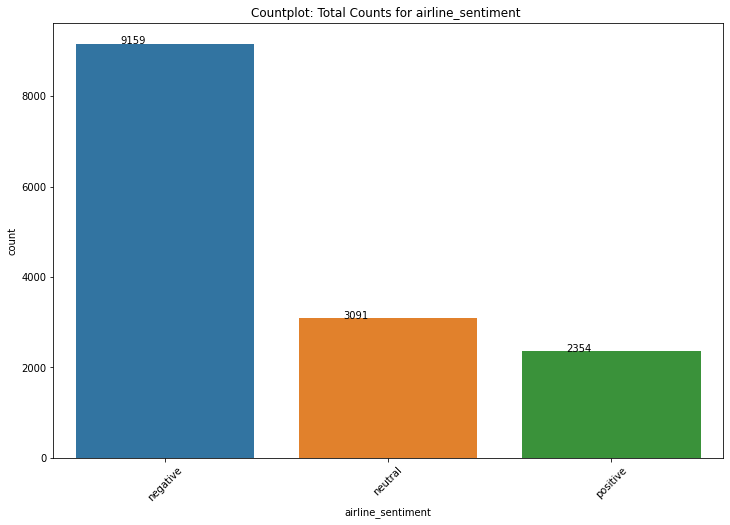

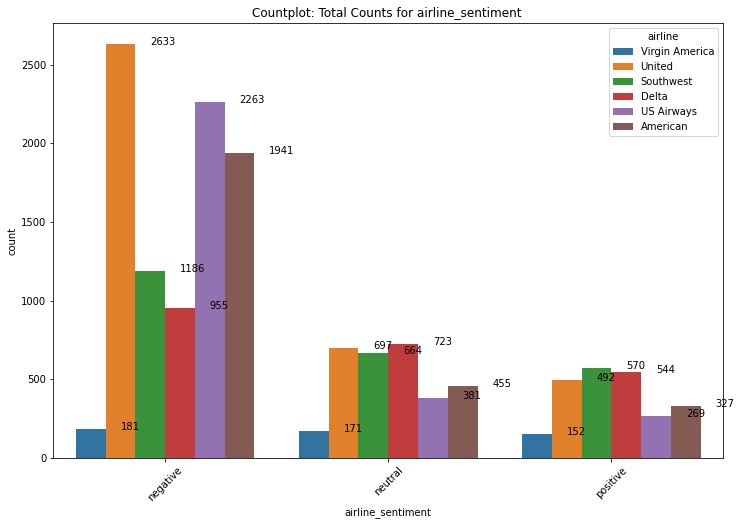

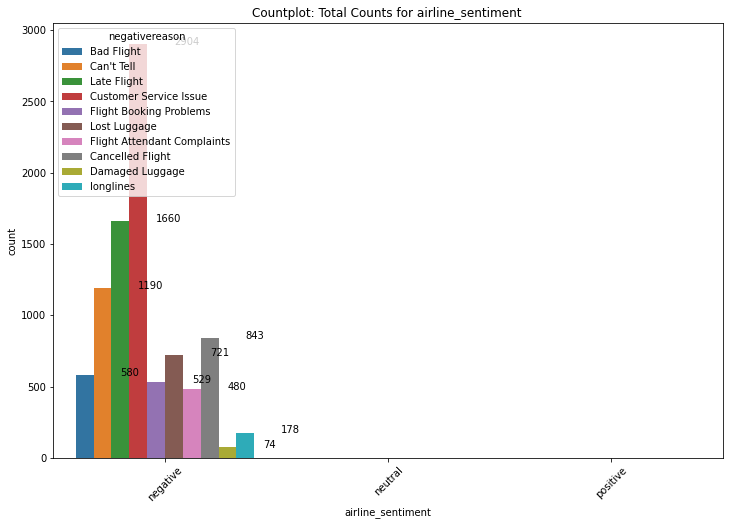

In [26]:
# Plot count plots
Temp_v = 'airline_sentiment'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'airline', order=df[Temp_v].value_counts(1).index);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)

ax = sns.countplot(data=df,x=Temp_v, hue='negativereason' , order=df[Temp_v].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* As seen earlier, there are 9159 negative, 3091 neutral and 2354 positive sentiment records in the dataset.

* Of all the negative reasons, 'Customer Service Issue' is the #1 reason, followed by 'Late Flight'. There are significant 'Can't Tell' reason as well
'Damaged Luggage' is the least mentioned reason

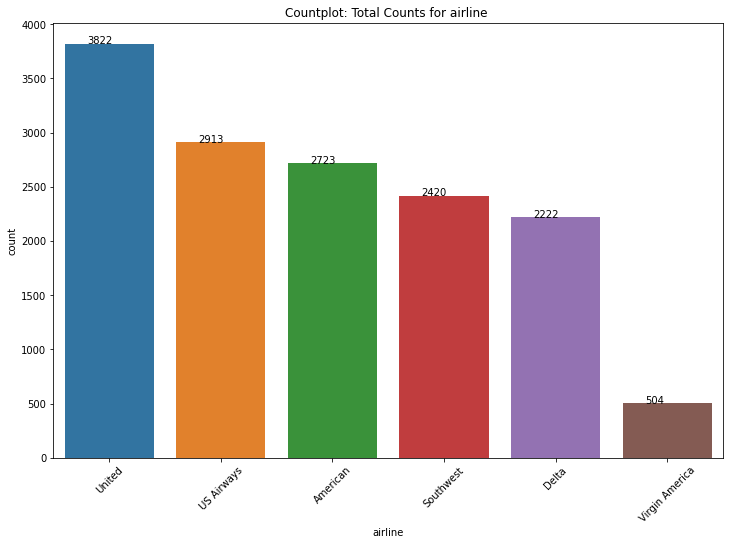

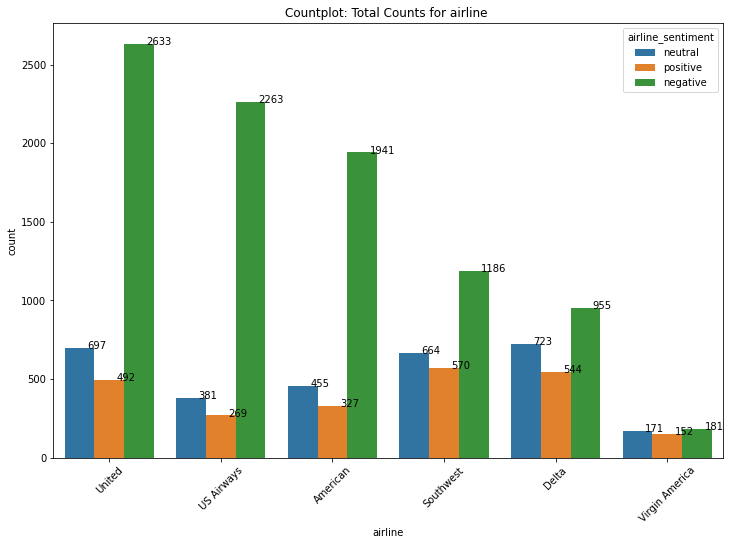

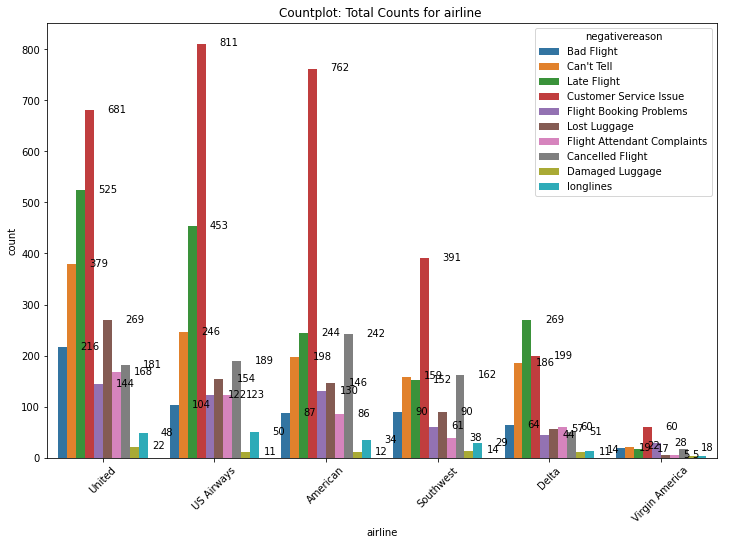

In [27]:
Temp_v = 'airline'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts(1).index);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='airline_sentiment' , order=df[Temp_v].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='negativereason' , order=df[Temp_v].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* United has the highest number of records, Virgin America has the least number of records

* United has the highest number of negative sentiment records, Virgin America has the least number

* Southwest has the most number of postive sentiment records

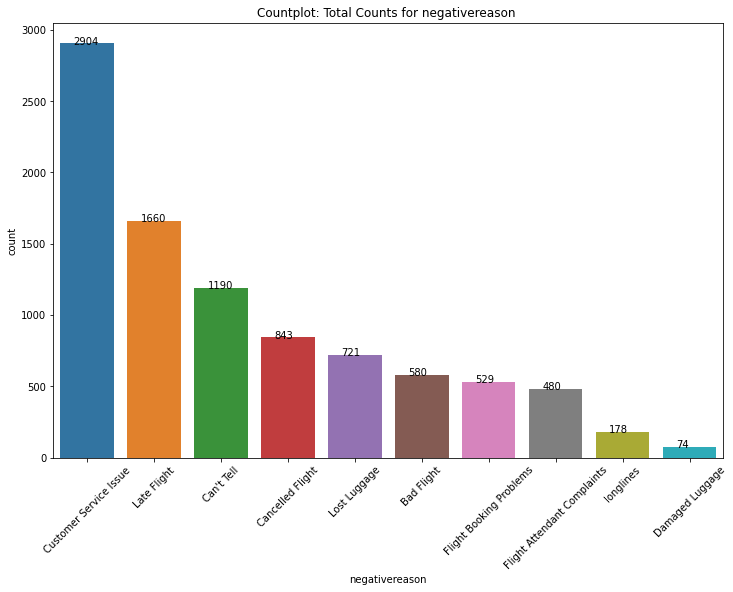

In [28]:
Temp_v = 'negativereason'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Top 3 negative reasons are same for all airlines. For all, 'Customer Service Issue' is the # reason, except for Delta. For Delta, #1 reason is 'Late Flight'.

Tokenize the data for word cloud.
Note that word cloud is created on as-is data, data is not pre-processed / cleaned yet.

In [29]:
df['text_new'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [30]:
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text_new'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

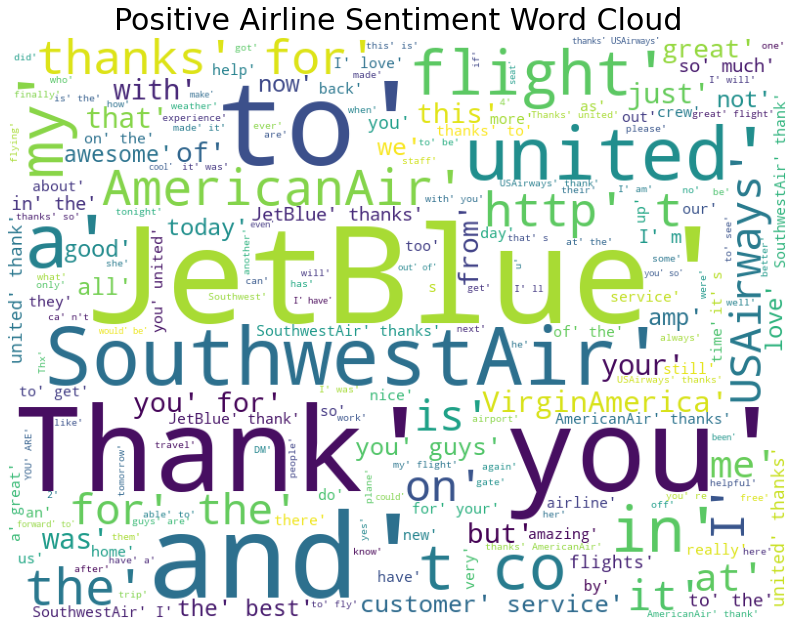

In [31]:
show_wordcloud(df[df.airline_sentiment == 'positive'], title = "Positive Airline Sentiment Word Cloud")

Most prominent 'positive words' are - 'Thank You', 'thanks','nice','help'. Lot of other words show up as well, which are not necessarily sentiment words.

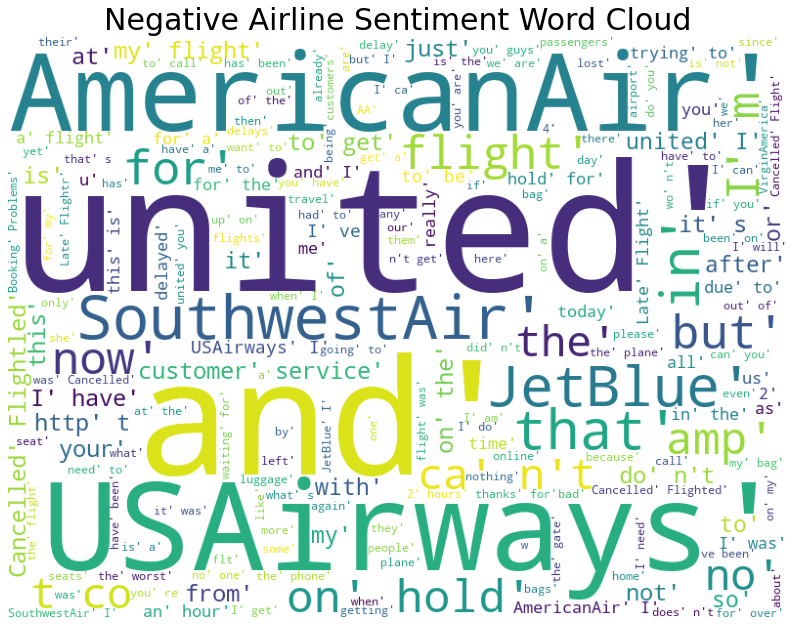

In [32]:
show_wordcloud(df[df.airline_sentiment == 'negative'], title = "Negative Airline Sentiment Word Cloud")

Most prominent 'negative words' are - 'Late Flight','An hour hold','delayed'. Lot of other words show up as well, which are not necessarily sentiment words. 

<b>EDA Summary</b>

* As seen earlier, there are 9159 negative, 3091 neutral and 2354 positive sentiment records in the dataset.

* Of all the negative reasons, 'Customer Service Issue' is the #1 reason, followed by 'Late Flight'. There are significant 'Can't Tell' reason as well
'Damaged Luggage' is the least mentioned reason

* United has the highest number of records, Virgin America has the least number of records

* United has the highest number of negative sentiment records, Virgin America has the least number

* Southwest has the most number of postive  

* Top 3 negative reasons are same for all airlines. For all, 'Customer Service Issue' is the # reason, except for Delta. For Delta, #1 reason is 'Late Flight'.

# 8. Perform Data Pre-processing

## Create final dataframe for preprocessing

Create final dataframe only with 2 features that are of interest for this exercise - text and airline_sentiment.

In [33]:
df_final = df[['airline_sentiment','text']]

In [34]:
df_final['airline_sentiment'].value_counts()

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

Let's replace sentiment values to numeric values.

Note - Tried without converting these values, it has no impact on the model performance.

In [35]:
df_final['airline_sentiment'] = df_final['airline_sentiment'].replace({'negative': '1', 'neutral': '2', 'positive':'3'}) 

In [36]:
df_final['airline_sentiment'].value_counts()

1    9159
2    3091
3    2354
Name: airline_sentiment, dtype: int64

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14604 non-null  object
 1   text               14604 non-null  object
dtypes: object(2)
memory usage: 858.3+ KB


In [38]:
df_final['airline_sentiment'] = df_final['airline_sentiment'].astype(int)

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14604 non-null  int64 
 1   text               14604 non-null  object
dtypes: int64(1), object(1)
memory usage: 858.3+ KB


In [40]:
df_final.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you've added commercials t...
2,2,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


In [41]:
df_final.shape

(14604, 2)

## Pre-processing Tasks

Note from rubric - 

Text pre-processing: Data preparation. 

NOTE:- Each text pre-processing step is done separately and dataset sample is shown after each step. 

  a. Remove html tags

  b. Replace Contractions

  c. Remove ascented characters

  d. Remove special characters

  e. Tokenization

  f. Conversion to lowercase

  g. Remove punctuation

  h. Removal of stopwords

  i. Lemmatize (or stemming) 

  j. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)  

In [42]:
# Prior to applying any data preprocessing

df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,@JetBlue the fact that #ChrisHasMadeUsBLUSH is...
7684,3,@JetBlue thank you
14553,1,"@AmericanAir @tennetexan Too bad there's only,..."
1524,1,"@united, you just caused a riot on the airplan..."
11868,1,@USAirways Almost 4 hours and coin now. Unders...
663,3,@united private jet would have been cool! Do d...
8244,3,@JetBlue Although it wasn't totally the answer...
10977,2,@USAirways I am following you now
12688,3,@AmericanAir thanks
13359,1,@AmericanAir I've been calling your 1800 # all...


In [43]:
# Prior to applying any data preprocessing

df_final.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you've added commercials t...
2,2,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


### Remove html tags

HTML tags were not actually seen in the sample or top records. But we will still use the function to remove, in case they are present in the text values.

In [44]:
# Create function using BeautifulSoup library to remove html

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

df_final['text'] = df_final['text'].apply(lambda x: strip_html(x))

In [45]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,@JetBlue the fact that #ChrisHasMadeUsBLUSH is...
7684,3,@JetBlue thank you
14553,1,"@AmericanAir @tennetexan Too bad there's only,..."
1524,1,"@united, you just caused a riot on the airplan..."
11868,1,@USAirways Almost 4 hours and coin now. Unders...
663,3,@united private jet would have been cool! Do d...
8244,3,@JetBlue Although it wasn't totally the answer...
10977,2,@USAirways I am following you now
12688,3,@AmericanAir thanks
13359,1,@AmericanAir I've been calling your 1800 # all...


In [46]:
df_final.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you've added commercials t...
2,2,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


### Replace Contractions

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. For example, I'll for I will, Can't for Can not etc.

This step will expand those contractions.

In [47]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df_final['text'] = df_final['text'].apply(lambda x: replace_contractions(x))


In [48]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,@JetBlue the fact that #ChrisHasMadeUsBLUSH is...
7684,3,@JetBlue thank you
14553,1,@AmericanAir @tennetexan Too bad there is only...
1524,1,"@united, you just caused a riot on the airplan..."
11868,1,@USAirways Almost 4 hours and coin now. Unders...
663,3,@united private jet would have been cool! Do d...
8244,3,@JetBlue Although it was not totally the answe...
10977,2,@USAirways I am following you now
12688,3,@AmericanAir thanks
13359,1,@AmericanAir I have been calling your 1800 # a...


In [49]:
df_final.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you have added commercials...
2,2,@VirginAmerica I did not today... Must mean I ...
3,1,@VirginAmerica it is really aggressive to blas...
4,1,@VirginAmerica and it is a really big bad thin...


It can be seen in the data that contractions like I've, You've, Wasn't etc. are now expanded.

### Remove ascented characters

Accented characters are important elements which are used to signify emphasis on a particular word during pronunciation or understanding. In some instances, the accent mark also clarifies the meaning of a word, which might be different without the accent. While their use in English is largely limited but there are very good chances that you will come across accented characters/letters in a free text corpus. Words such as résumé, café, prótest, divorcé, coördinate, exposé, latté etc.

Ascented characters were not actually seen in the sample or top records. But we will still use the function to replace them, in case they are present in the text values.In this step, we will replace ascented characters with closest engligh letters.

In [50]:
#remove accented characters
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

df_final['text'] = df_final['text'].apply(lambda x: remove_accented_chars(x))

In [51]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,@JetBlue the fact that #ChrisHasMadeUsBLUSH is...
7684,3,@JetBlue thank you
14553,1,@AmericanAir @tennetexan Too bad there is only...
1524,1,"@united, you just caused a riot on the airplan..."
11868,1,@USAirways Almost 4 hours and coin now. Unders...
663,3,@united private jet would have been cool! Do d...
8244,3,@JetBlue Although it was not totally the answe...
10977,2,@USAirways I am following you now
12688,3,@AmericanAir thanks
13359,1,@AmericanAir I have been calling your 1800 # a...


In [52]:
df_final.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you have added commercials...
2,2,@VirginAmerica I did not today... Must mean I ...
3,1,@VirginAmerica it is really aggressive to blas...
4,1,@VirginAmerica and it is a really big bad thin...


### Remove special characters

Special characters are non-alphanumeric characters. In this step, those will be removed.

In [53]:
#remove special characters
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

df_final['text'] = df_final['text'].apply(lambda x: remove_special_characters(x, remove_digits=True))


In [54]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,JetBlue the fact that ChrisHasMadeUsBLUSH is n...
7684,3,JetBlue thank you
14553,1,AmericanAir tennetexan Too bad there is only l...
1524,1,united you just caused a riot on the airplane ...
11868,1,USAirways Almost hours and coin now Understan...
663,3,united private jet would have been cool Do doe...
8244,3,JetBlue Although it was not totally the answer...
10977,2,USAirways I am following you now
12688,3,AmericanAir thanks
13359,1,AmericanAir I have been calling your all mor...


In [55]:
df_final.head()

,airline_sentiment,text
0,2,VirginAmerica What dhepburn said
1,3,VirginAmerica plus you have added commercials ...
2,2,VirginAmerica I did not today Must mean I need...
3,1,VirginAmerica it is really aggressive to blast...
4,1,VirginAmerica and it is a really big bad thing...


Special characters like #,@,& were seen in the sample records. Those are now removed.

### Tokenization

Tokenization is the task of taking a text or set of text and breaking it up into itsindividual tokens. Tokens are usually individual words (at least in languageslikeEnglish).
With the help of nltk.tokenize.word_tokenize() method, we are able to extract the tokens from string of characters.

In [56]:
df_final['text'] = df_final.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [57]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,"[JetBlue, the, fact, that, ChrisHasMadeUsBLUSH..."
7684,3,"[JetBlue, thank, you]"
14553,1,"[AmericanAir, tennetexan, Too, bad, there, is,..."
1524,1,"[united, you, just, caused, a, riot, on, the, ..."
11868,1,"[USAirways, Almost, hours, and, coin, now, Und..."
663,3,"[united, private, jet, would, have, been, cool..."
8244,3,"[JetBlue, Although, it, was, not, totally, the..."
10977,2,"[USAirways, I, am, following, you, now]"
12688,3,"[AmericanAir, thanks]"
13359,1,"[AmericanAir, I, have, been, calling, your, al..."


In [58]:
df_final.head()

,airline_sentiment,text
0,2,"[VirginAmerica, What, dhepburn, said]"
1,3,"[VirginAmerica, plus, you, have, added, commer..."
2,2,"[VirginAmerica, I, did, not, today, Must, mean..."
3,1,"[VirginAmerica, it, is, really, aggressive, to..."
4,1,"[VirginAmerica, and, it, is, a, really, big, b..."


Text field now contains list of tokens.

### Conversion to lowercase

Convert text field to lower case letters.

In [59]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

df_final['text'] = df_final['text'].apply(lambda x: to_lowercase(x))

In [60]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,"[jetblue, the, fact, that, chrishasmadeusblush..."
7684,3,"[jetblue, thank, you]"
14553,1,"[americanair, tennetexan, too, bad, there, is,..."
1524,1,"[united, you, just, caused, a, riot, on, the, ..."
11868,1,"[usairways, almost, hours, and, coin, now, und..."
663,3,"[united, private, jet, would, have, been, cool..."
8244,3,"[jetblue, although, it, was, not, totally, the..."
10977,2,"[usairways, i, am, following, you, now]"
12688,3,"[americanair, thanks]"
13359,1,"[americanair, i, have, been, calling, your, al..."


In [61]:
df_final.head()

,airline_sentiment,text
0,2,"[virginamerica, what, dhepburn, said]"
1,3,"[virginamerica, plus, you, have, added, commer..."
2,2,"[virginamerica, i, did, not, today, must, mean..."
3,1,"[virginamerica, it, is, really, aggressive, to..."
4,1,"[virginamerica, and, it, is, a, really, big, b..."


### Remove punctuation

Remove non-word, non-space characters with blank.

In [62]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

df_final['text'] = df_final['text'].apply(lambda x: remove_punctuation(x))

In [63]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,"[jetblue, the, fact, that, chrishasmadeusblush..."
7684,3,"[jetblue, thank, you]"
14553,1,"[americanair, tennetexan, too, bad, there, is,..."
1524,1,"[united, you, just, caused, a, riot, on, the, ..."
11868,1,"[usairways, almost, hours, and, coin, now, und..."
663,3,"[united, private, jet, would, have, been, cool..."
8244,3,"[jetblue, although, it, was, not, totally, the..."
10977,2,"[usairways, i, am, following, you, now]"
12688,3,"[americanair, thanks]"
13359,1,"[americanair, i, have, been, calling, your, al..."


In [64]:
df_final.head()

,airline_sentiment,text
0,2,"[virginamerica, what, dhepburn, said]"
1,3,"[virginamerica, plus, you, have, added, commer..."
2,2,"[virginamerica, i, did, not, today, must, mean..."
3,1,"[virginamerica, it, is, really, aggressive, to..."
4,1,"[virginamerica, and, it, is, a, really, big, b..."


### Removal of stopwords

In [65]:
stopwords = stopwords.words('english')

# Set custom stop-word's list. Words 'not','no' are retained as these add meaning to sentiments.
customlist = ['not','no']

stopwords = list(set(stopwords) - set(customlist))                              

In [66]:
print(stopwords)

['ll', 'doing', 'just', "shouldn't", 'mustn', 'she', 'my', 'have', 'but', 'as', 'it', 'through', "doesn't", 'your', 'while', 'don', "haven't", 'they', 'above', 'more', 'himself', 'out', 'y', 'will', "needn't", 'to', 'nor', 'its', 'was', 'a', 'm', 'so', 'yourself', 'be', 'until', 'yours', 'only', 'o', 's', "she's", 'is', "you'll", 'needn', 'few', 'about', 'theirs', 'this', 'that', 'isn', 'themselves', "it's", "hadn't", 'won', 'ourselves', 'has', 'did', 'if', 'during', 'didn', 'doesn', "mightn't", 'too', "won't", 'weren', 'same', 'at', 've', 'him', 'shouldn', 'her', "you're", 'yourselves', 'of', 'which', 'for', 'wouldn', 'off', 're', 'an', 'all', "didn't", 'against', 'd', 'he', 'further', 'does', 'herself', 't', 'ain', 'me', 'mightn', "you'd", 'these', 'after', "should've", 'we', 'his', 'under', 'how', 'am', 'whom', 'i', 'then', 'the', "hasn't", 'haven', 'been', 'them', 'into', 'who', 'and', "wasn't", 'those', 'should', 'shan', 'hadn', 'other', "wouldn't", 'wasn', 'our', 'ours', 'ma', "i

In [67]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

df_final['text'] = df_final['text'].apply(lambda x: remove_stopwords(x))

In [68]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,"[jetblue, fact, chrishasmadeusblush, not, tren..."
7684,3,"[jetblue, thank]"
14553,1,"[americanair, tennetexan, bad, like, people, t..."
1524,1,"[united, caused, riot, airplane, never, seen, ..."
11868,1,"[usairways, almost, hours, coin, understand, h..."
663,3,"[united, private, jet, would, cool, not, work,..."
8244,3,"[jetblue, although, not, totally, answer, look..."
10977,2,"[usairways, following]"
12688,3,"[americanair, thanks]"
13359,1,"[americanair, calling, morning, change, name, ..."


In [69]:
df_final.head()

,airline_sentiment,text
0,2,"[virginamerica, dhepburn, said]"
1,3,"[virginamerica, plus, added, commercials, expe..."
2,2,"[virginamerica, not, today, must, mean, need, ..."
3,1,"[virginamerica, really, aggressive, blast, obn..."
4,1,"[virginamerica, really, big, bad, thing]"


Severak stopwaords seen earlier are now removed from text.

### Lemmatization

Lemmatization is the process wherein the context is used to convert a word to its meaningful base or root form. Lemmatization involves resolving words to their dictionary form.A lemma of a word is it's dictionary or canonical form. For example, the lemma of the words “playing” and “played” is “play”.

Alternatively, we could have used Stemming as well.

In [70]:
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

df_final['text'] = df_final['text'].apply(lambda x: lemmatize_list(x))

In [71]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,"[jetblue, fact, chrishasmadeusblush, not, tren..."
7684,3,"[jetblue, thank]"
14553,1,"[americanair, tennetexan, bad, like, people, t..."
1524,1,"[unite, cause, riot, airplane, never, see, any..."
11868,1,"[usairways, almost, hours, coin, understand, h..."
663,3,"[unite, private, jet, would, cool, not, work, ..."
8244,3,"[jetblue, although, not, totally, answer, look..."
10977,2,"[usairways, follow]"
12688,3,"[americanair, thank]"
13359,1,"[americanair, call, morning, change, name, upc..."


In [72]:
df_final.head()

,airline_sentiment,text
0,2,"[virginamerica, dhepburn, say]"
1,3,"[virginamerica, plus, add, commercials, experi..."
2,2,"[virginamerica, not, today, must, mean, need, ..."
3,1,"[virginamerica, really, aggressive, blast, obn..."
4,1,"[virginamerica, really, big, bad, thing]"


Words like 'catering' or 'said' are now changed to 'cater','say' respectively.

### Convert to string

In [73]:
def convert_to_string (words):
  return ' '.join(words)


df_final['text'] = df_final['text'].apply(lambda x: convert_to_string(x))

In [74]:
df_final.sample(20, random_state=1)

,airline_sentiment,text
7423,2,jetblue fact chrishasmadeusblush not trend kno...
7684,3,jetblue thank
14553,1,americanair tennetexan bad like people team ne...
1524,1,unite cause riot airplane never see anything like
11868,1,usairways almost hours coin understand higher ...
663,3,unite private jet would cool not work try
8244,3,jetblue although not totally answer look appre...
10977,2,usairways follow
12688,3,americanair thank
13359,1,americanair call morning change name upcoming ...


In [75]:
df_final.head()

,airline_sentiment,text
0,2,virginamerica dhepburn say
1,3,virginamerica plus add commercials experience ...
2,2,virginamerica not today must mean need take an...
3,1,virginamerica really aggressive blast obnoxiou...
4,1,virginamerica really big bad thing


### Word cloud on preprocessed data

Word cloud on positive and negative sentiment words is created in this section.

In [76]:
df_final.count()

airline_sentiment    14604
text                 14604
dtype: int64

In [77]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14604 non-null  int64 
 1   text               14604 non-null  object
dtypes: int64(1), object(1)
memory usage: 858.3+ KB


In [78]:
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

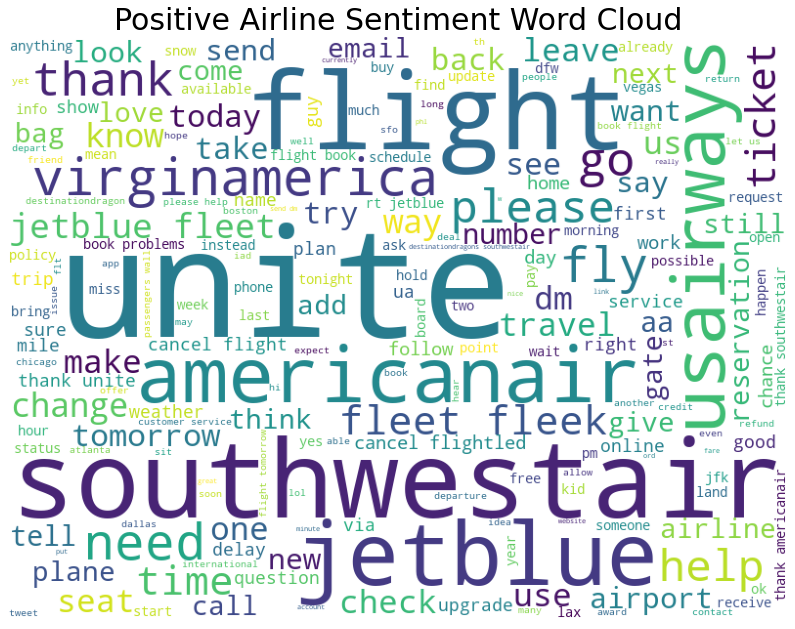

In [79]:
show_wordcloud(df_final[df_final.airline_sentiment == 2], title = "Positive Airline Sentiment Word Cloud")

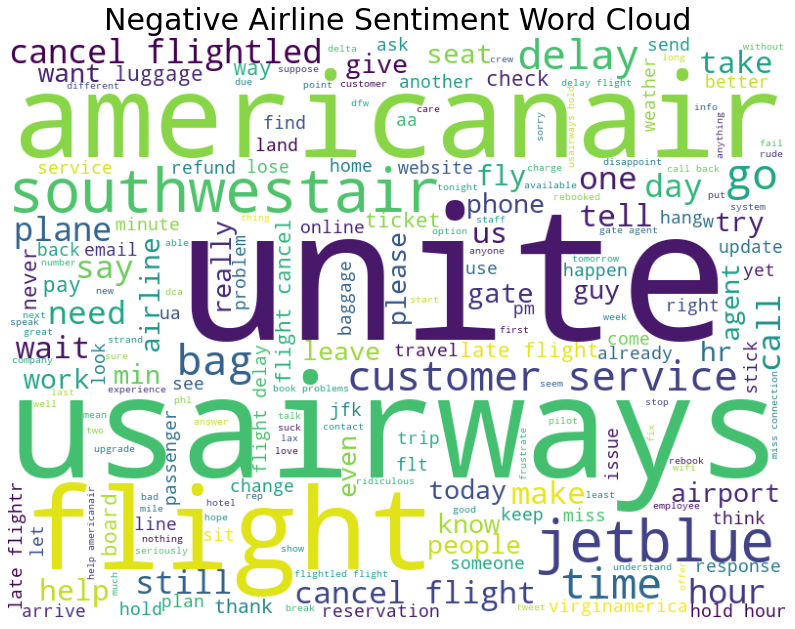

In [80]:
show_wordcloud(df_final[df_final.airline_sentiment == 1], title = "Negative Airline Sentiment Word Cloud")

### Review Final dataset for vectorization

In [81]:
df_final['airline_sentiment'].value_counts()

1    9159
2    3091
3    2354
Name: airline_sentiment, dtype: int64

In [82]:
df_final.sample(20,random_state=1)

,airline_sentiment,text
7423,2,jetblue fact chrishasmadeusblush not trend kno...
7684,3,jetblue thank
14553,1,americanair tennetexan bad like people team ne...
1524,1,unite cause riot airplane never see anything like
11868,1,usairways almost hours coin understand higher ...
663,3,unite private jet would cool not work try
8244,3,jetblue although not totally answer look appre...
10977,2,usairways follow
12688,3,americanair thank
13359,1,americanair call morning change name upcoming ...


Note - As suggested in MLS, for the imbalanced data, used below method to create same number of records for each sentiment class. Used same number of records for model training. However, not much improvement was seen. Hence the code is commented and not utilized.

In [83]:
# df_final_negative = df_final[df_final['airline_sentiment'] == 'negative']
# df_final_neutral = df_final[df_final['airline_sentiment'] == 'neutral']
# df_final_positive = df_final[df_final['airline_sentiment'] == 'positive']

In [84]:
# df_final_negative1=df_final_negative.iloc[:2350,:]
# df_final_neutral1=df_final_neutral.iloc[:2350,:]
# df_final_positive1=df_final_positive.iloc[:2350,:]

In [85]:
#frames=[df_final_negative1,df_final_neutral1,df_final_positive1]

In [86]:
#df_final= pd.concat(frames)

In [87]:
#df_final['airline_sentiment'].value_counts()

# 9. Prepare TRAIN and TEST datasets

Separate TRAIN and TEST datasets from TOTAL dataset.

We will use stratify on class while splitting the datasets. This will ensure that proportion of classes will be similar in datasets.

Let's separate Dependent and Independent features in X and y

In [88]:
# Create train and test datasets

X = df_final['text']
y = df_final['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42,stratify=y) 

In [89]:
X.shape

(14604,)

In [90]:
# Shapes of TOTAL, TRAIN and TEST Datasets

print(" TOTAL Dataset \n Rows:", X.shape[0], "\n", "Number of labels: \n", y.value_counts(1), "\n")

print(" TRAIN Dataset \n Rows:", X_train.shape[0], "\n", "Number of labels: \n", y_train.value_counts(1), "\n")

print(" TEST Dataset \n Rows:", X_test.shape[0], "\n", "Number of labels: \n", y_test.value_counts(1), "\n")

 TOTAL Dataset 
 Rows: 14604 
 Number of labels: 
 1   0.6272
2   0.2117
3   0.1612
Name: airline_sentiment, dtype: float64 

 TRAIN Dataset 
 Rows: 11683 
 Number of labels: 
 1   0.6272
2   0.2117
3   0.1612
Name: airline_sentiment, dtype: float64 

 TEST Dataset 
 Rows: 2921 
 Number of labels: 
 1   0.6272
2   0.2116
3   0.1612
Name: airline_sentiment, dtype: float64 



Due to use of stratify on target feature while splitting the datasets, proportion of classes is similar in Train and Test datasets.

In [91]:
y_train.head()

9234    1
9110    2
4987    3
3796    1
3558    3
Name: airline_sentiment, dtype: int64

TRAIN and TEST Datasets are ready now.

# 10. Supervised models

In this section, we will create Supervised Classification Models using Random Forest Classifier.

We wil use below steps - 

1. Using Count Vectorizer

  a. Convert the data into DTM (Document Term Matrix)

  b. Find optimal number of estimators (Trees) for RF using cross_val_score

  c. Train the model on Train data

  d. Predict on Test data

  e. Find accuracy and other metrics, plot confusion matrix , plot word cloud

  f. Repeat steps from b to e with SMOTE

2. Same steps as in 1 with TF-IDF formatted data, first with as-is data and then with SMOTE oversampling



## Using Bag of Words (CountVectorizer)

In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [92]:
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=1500)                # Keep limited features as number of features will increase the processing time.
X_train_bow = Count_vec.fit_transform(X_train)

X_train_bow = X_train_bow.toarray()                        # Convert the data features to array.

In [93]:
# Convert Test data to DTM

X_test_bow = Count_vec.transform(X_test)
X_test_bow = X_test_bow.toarray()                        # Convert the data features to array.

In [94]:
# Check the shape

X_train_bow.shape

(11683, 1500)

As we limited the number of features to 500, ony 500 are present in the Train dataset.

In [95]:
y_train.value_counts()

1    7327
2    2473
3    1883
Name: airline_sentiment, dtype: int64

In [96]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,300,50).tolist()
base_ln

[100, 150, 200, 250]

In [97]:
# K-Fold Cross - validation, we used K=10.
cv_scores_bow = []
for b in base_ln:
    clf_bow = RandomForestClassifier(n_estimators = b,random_state=1)
    scores_bow = cross_val_score(clf_bow, X_train_bow, y_train, cv = 10, scoring = 'accuracy')
    cv_scores_bow.append(scores_bow.mean())

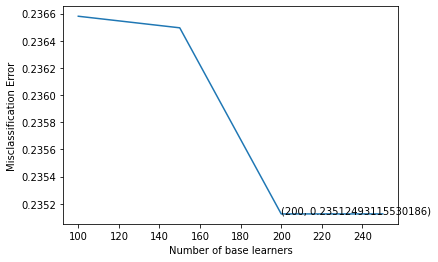

In [98]:
# plotting the error as nuber of estimators increase
error = [1 - x for x in cv_scores_bow]                                 #error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [99]:
# Training the best model and calculating accuracy on test data .
# Optimal nuber of estimators was seen as in graph above 

clf_bow = RandomForestClassifier(n_estimators = optimal_learners, random_state=1, class_weight='balanced')
clf_bow.fit(X_train_bow, y_train)
clf_bow.score(X_test_bow, y_test)
predicted_test_bow = clf_bow.predict(X_test_bow)
print(classification_report(y_test ,predicted_test_bow , target_names = ['negative', 'neutral', 'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,predicted_test_bow))

              precision    recall  f1-score   support

    negative       0.83      0.90      0.87      1832
     neutral       0.62      0.52      0.56       618
    positive       0.70      0.62      0.66       471

    accuracy                           0.78      2921
   macro avg       0.72      0.68      0.70      2921
weighted avg       0.77      0.78      0.77      2921

Accuracy of the model is :  0.7764464224580623


Text(0.5, 42.0, 'Predicted label')

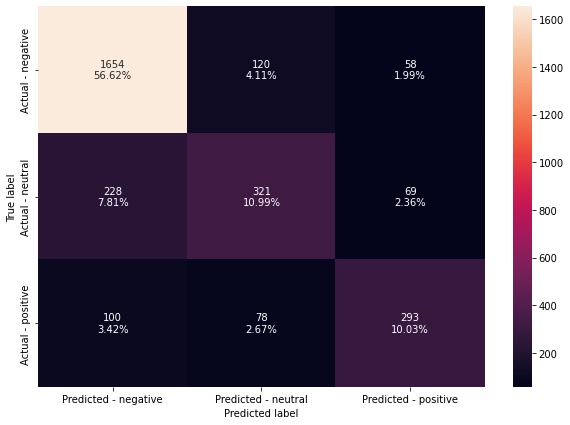

In [100]:
# Print confusion matrix

cm_bow=metrics.confusion_matrix(y_test,predicted_test_bow, labels=[1,2,3])

df_cm_bow = pd.DataFrame(cm_bow, index = [i for i in ["Actual - negative","Actual - neutral", "Actual - positive"]],
                  columns = [i for i in ['Predicted - negative','Predicted - neutral', 'Predicted - positive' ]])
group_counts = ["{0:0.0f}".format(value) for value in
                cm_bow.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                         cm_bow.flatten()/np.sum(cm_bow)]
labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_bow, annot=labels,fmt='');
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [101]:
# Print top 40 important features

all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features_bow=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf_bow.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features_bow+=all_features[i]
    top_features_bow+='\n'
    
print(top_features_bow)

thank
not
great
no
delay
love
flight
jetblue
hours
usairways
unite
awesome
hold
get
southwestair
best
americanair
wait
cancel
amaze
hour
call
bag
service
appreciate
good
need
customer
make
time
please
airline
fly
would
help
virginamerica
dm
worst
go
guy



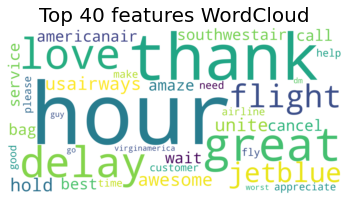

In [102]:
# Word cloud for top 40 important features
wordcloud_bow = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features_bow)

# Display the generated image:
plt.imshow(wordcloud_bow, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### With SMOTE Over sampling

Let's also try creating datasets using SMOTE.

In [103]:
##Applying SMOTE on train

smote=SMOTE()

X_smote_bow, y_smote_bow = smote.fit_resample(X_train_bow, y_train)

In [104]:
print(" TRAIN-SMOTE Dataset \n Rows:", X_smote_bow.shape[0], "\n", "Number of labels: \n", y_smote_bow.value_counts(), "\n")

 TRAIN-SMOTE Dataset 
 Rows: 21981 
 Number of labels: 
 1    7327
2    7327
3    7327
Name: airline_sentiment, dtype: int64 



Number of records for each class is now balanced.

In [105]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,50).tolist()
base_ln

[100, 150, 200, 250, 300, 350]

In [106]:
# K-Fold Cross - validation with SMOTE data
cv_scores_bow_smote = []
for b in base_ln:
    clf_bow_smote = RandomForestClassifier(n_estimators = b,random_state=1)
    scores_bow_smote = cross_val_score(clf_bow_smote, X_smote_bow, y_smote_bow, cv = 10, scoring = 'accuracy')
    cv_scores_bow_smote.append(scores_bow_smote.mean())

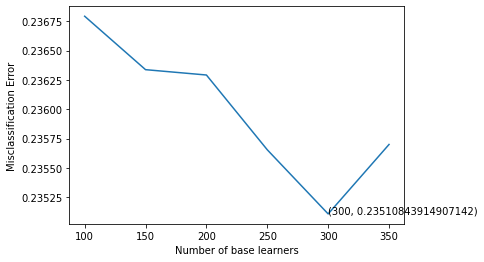

In [107]:
# plotting the error as number of estimators increase
error = [1 - x for x in cv_scores_bow_smote]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [108]:
# Training the best model and calculating accuracy on test data .
clf_bow_smote = RandomForestClassifier(n_estimators = optimal_learners,random_state=1)
clf_bow_smote.fit(X_smote_bow, y_smote_bow)
clf_bow_smote.score(X_test_bow, y_test)
predicted_test_bow_smote = clf_bow_smote.predict(X_test_bow)
print(classification_report(y_test ,predicted_test_bow_smote , target_names = ['negative' , 'neutral', 'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,predicted_test_bow_smote))

              precision    recall  f1-score   support

    negative       0.86      0.82      0.84      1832
     neutral       0.51      0.56      0.54       618
    positive       0.59      0.63      0.61       471

    accuracy                           0.73      2921
   macro avg       0.66      0.67      0.66      2921
weighted avg       0.74      0.73      0.74      2921

Accuracy of the model is :  0.733652858610065


Text(0.5, 42.0, 'Predicted label')

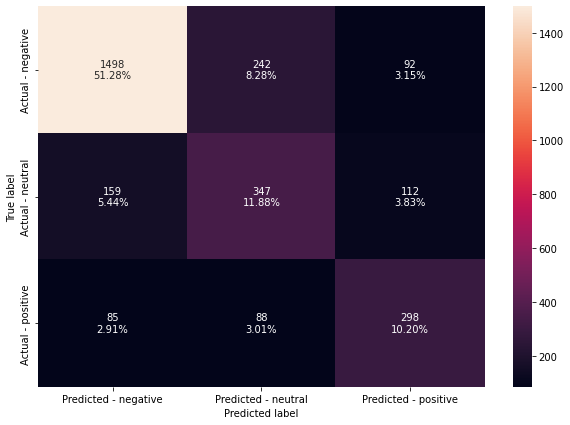

In [109]:
# Print confusion matrix

cm_bow_smote=metrics.confusion_matrix(y_test,predicted_test_bow_smote, labels=[1,2,3])

df_cm_bow_smote = pd.DataFrame(cm_bow_smote, index = [i for i in ["Actual - negative","Actual - neutral", "Actual - positive"]],
                  columns = [i for i in ['Predicted - negative','Predicted - neutral', 'Predicted - positive' ]])
group_counts = ["{0:0.0f}".format(value) for value in
                cm_bow_smote.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                         cm_bow_smote.flatten()/np.sum(cm_bow_smote)]
labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_bow_smote, annot=labels,fmt='');
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [110]:
# Print top 40 important features

all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features_bow_smote=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf_bow_smote.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features_bow_smote+=all_features[i]
    top_features_bow_smote+='\n'
    
print(top_features_bow_smote)

thank
not
flight
no
delay
great
hours
get
love
hold
usairways
unite
cancel
wait
bag
call
jetblue
service
americanair
time
southwestair
hour
plane
still
customer
try
need
go
tell
never
lose
best
miss
dm
help
make
say
would
please
worst



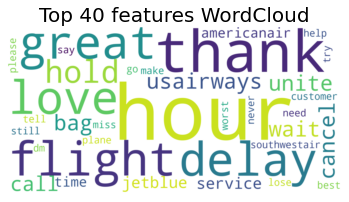

In [111]:
# Word cloud for top 40 important features

wordcloud_bow = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features_bow_smote)

# Display the generated image:
plt.imshow(wordcloud_bow, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Using TF-IDF Vectorizer

Term Frequency - Inverse Document Frequency: It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [112]:
# Using TfidfVectorizer to convert text data to numbers.

#from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1500)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

X_train_tfidf = X_train_tfidf.toarray()

In [113]:
# Convert Test data to TF-IDF

X_test_tfidf = tfidf_vect.transform(X_test)
X_test_tfidf = X_test_tfidf.toarray() 

In [114]:
X_test_tfidf.shape

(2921, 1500)

In [115]:
X_train_tfidf.shape

(11683, 1500)

In [116]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,300,50).tolist()
base_ln

[100, 150, 200, 250]

In [117]:
# K-Fold Cross - validation .
cv_scores_tfidf = []
for b in base_ln:
    clf_tfidf = RandomForestClassifier(n_estimators = b, random_state=1, class_weight='balanced')
    scores_tfidf = cross_val_score(clf_tfidf, X_train_tfidf, y_train, cv = 10, scoring = 'accuracy')
    cv_scores_tfidf.append(scores_tfidf.mean())

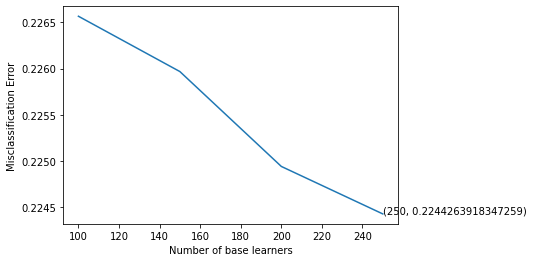

In [118]:
# plotting the error as k increases
error = [1 - x for x in cv_scores_tfidf]                                 #error corresponds to each estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [119]:
# Training the best model and calculating accuracy on test data .
clf_tfidf_final = RandomForestClassifier(n_estimators = optimal_learners, random_state=1,class_weight='balanced')
clf_tfidf_final.fit(X_train_tfidf, y_train)
clf_tfidf_final.fit(X_train_tfidf, y_train)
clf_tfidf_final.score(X_test_tfidf, y_test)
prediction_test_tfidf = clf_tfidf_final.predict(X_test_tfidf)
print(classification_report(y_test , prediction_test_tfidf , target_names = ['negative' , 'neutral', 'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,prediction_test_tfidf))

              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      1832
     neutral       0.63      0.51      0.57       618
    positive       0.74      0.58      0.65       471

    accuracy                           0.78      2921
   macro avg       0.73      0.67      0.69      2921
weighted avg       0.77      0.78      0.77      2921

Accuracy of the model is :  0.7754193769257104


Text(0.5, 42.0, 'Predicted label')

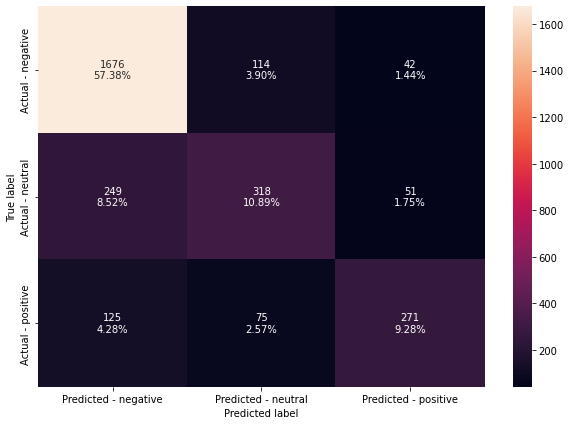

In [120]:
# Plot confusion matrix
    
cm_tfidf=metrics.confusion_matrix(y_test, prediction_test_tfidf, labels=[1,2,3])

df_cm_tfidf = pd.DataFrame(cm_tfidf, index = [i for i in ["Actual - negative","Actual - neutral", "Actual - positive"]],
                  columns = [i for i in ['Predicted - negative','Predicted - neutral', 'Predicted - positive' ]])
group_counts = ["{0:0.0f}".format(value) for value in
                cm_tfidf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                         cm_tfidf.flatten()/np.sum(cm_tfidf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_tfidf, annot=labels,fmt='');
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [121]:
# Print top 40 important features

all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features_tfidf=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf_tfidf_final.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features_tfidf+=all_features[i]
    top_features_tfidf+='\n'
    
print(top_features_tfidf)

thank
not
jetblue
great
usairways
unite
southwestair
no
flight
americanair
delay
love
hours
awesome
get
cancel
hold
best
wait
virginamerica
call
amaze
good
hour
service
make
bag
need
customer
appreciate
fly
please
dm
time
airline
would
help
guy
much
lose



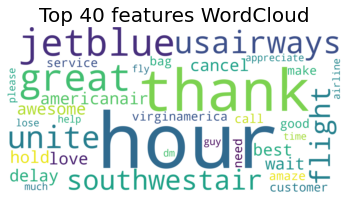

In [122]:
# Word cloud for top 40 important features

wordcloud_tfidf = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features_tfidf)

# Display the generated image:
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### With SMOTE Over sampling

Let's also try creating datasets using SMOTE.

In [123]:
##Applying SMOTE on train

smote=SMOTE()

X_smote_tfidf, y_smote_tfidf = smote.fit_resample(X_train_tfidf, y_train)

In [124]:
print(" TRAIN-SMOTE with TF-IDF Dataset \n Rows:", X_smote_tfidf.shape[0], "\n", "Number of labels: \n", y_smote_tfidf.value_counts(), "\n")

 TRAIN-SMOTE with TF-IDF Dataset 
 Rows: 21981 
 Number of labels: 
 1    7327
2    7327
3    7327
Name: airline_sentiment, dtype: int64 



In [125]:
# K-Fold Cross - validation with SMOTE data
cv_scores_tfidf_smote = []
for b in base_ln:
    clf_tfidf_smote = RandomForestClassifier(n_estimators = b,random_state=1)
    scores_tfidf_smote = cross_val_score(clf_tfidf_smote, X_smote_tfidf, y_smote_tfidf, cv = 10, scoring = 'accuracy')
    cv_scores_tfidf_smote.append(scores_tfidf_smote.mean())

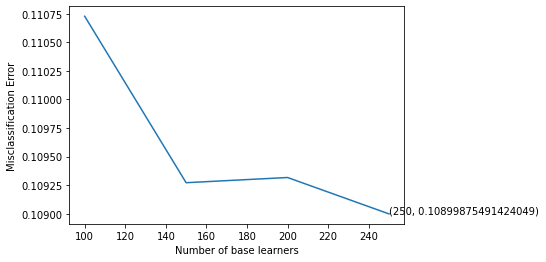

In [126]:
# plotting the error as number of estimators increase
error = [1 - x for x in cv_scores_tfidf_smote]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [127]:
# Training the best model and calculating accuracy on test data .
clf_tfidf_smote = RandomForestClassifier(n_estimators = optimal_learners,random_state=1)
clf_tfidf_smote.fit(X_smote_tfidf, y_smote_tfidf)
clf_tfidf_smote.score(X_test_tfidf, y_test)
predicted_test_tfidf_smote = clf_tfidf_smote.predict(X_test_tfidf)
print(classification_report(y_test ,predicted_test_tfidf_smote , target_names = ['negative' , 'neutral', 'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,predicted_test_tfidf_smote))

              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1832
     neutral       0.58      0.56      0.57       618
    positive       0.71      0.61      0.66       471

    accuracy                           0.77      2921
   macro avg       0.71      0.68      0.70      2921
weighted avg       0.76      0.77      0.77      2921

Accuracy of the model is :  0.7689147552208148


Text(0.5, 42.0, 'Predicted label')

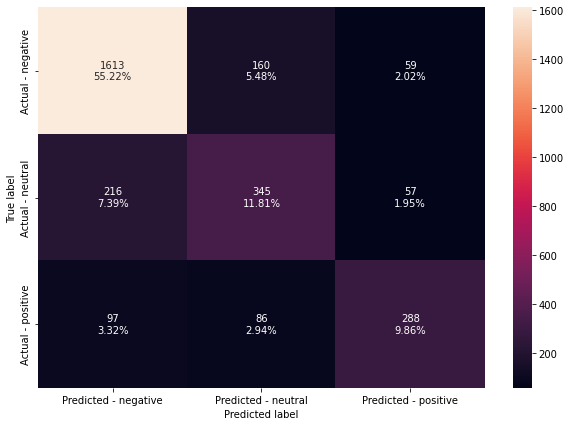

In [128]:
# Print confusion matrix

cm_ifidf_smote=metrics.confusion_matrix(y_test,predicted_test_tfidf_smote, labels=[1,2,3])

df_cm_tfidf_smote = pd.DataFrame(cm_ifidf_smote, index = [i for i in ["Actual - negative","Actual - neutral", "Actual - positive"]],
                  columns = [i for i in ['Predicted - negative','Predicted - neutral', 'Predicted - positive' ]])
group_counts = ["{0:0.0f}".format(value) for value in
                cm_ifidf_smote.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                         cm_ifidf_smote.flatten()/np.sum(cm_ifidf_smote)]
labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_tfidf_smote, annot=labels,fmt='');
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [129]:
# Print top 40 important features

all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features_tfidf_smote=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf_tfidf_smote.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features_tfidf_smote+=all_features[i]
    top_features_tfidf_smote+='\n'
    
print(top_features_tfidf_smote)

thank
not
jetblue
great
southwestair
unite
usairways
flight
americanair
no
love
delay
hours
virginamerica
awesome
best
get
cancel
hold
amaze
wait
service
need
call
make
good
bag
appreciate
customer
please
time
hour
dm
fly
airline
lose
guy
help
would
try



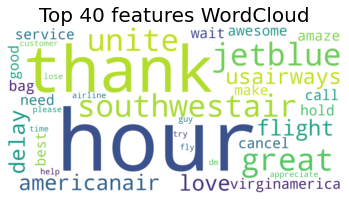

In [130]:
# Word cloud for top 40 important features

wordcloud_bow = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features_tfidf_smote)

# Display the generated image:
plt.imshow(wordcloud_bow, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# 11. Unsupervised methods for Sentiment analysis

In [131]:
df_unsupervised = df_final.copy()

Created a separate dataset for unsupervised learning

In [132]:
df_unsupervised.head()

,airline_sentiment,text
0,2,virginamerica dhepburn say
1,3,virginamerica plus add commercials experience ...
2,2,virginamerica not today must mean need take an...
3,1,virginamerica really aggressive blast obnoxiou...
4,1,virginamerica really big bad thing


In [133]:
df_unsupervised.shape 

(14604, 2)

In [134]:
df_unsupervised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14604 non-null  int64 
 1   text               14604 non-null  object
dtypes: int64(1), object(1)
memory usage: 858.3+ KB


In [135]:
df_unsupervised.sample(20,random_state=1)

,airline_sentiment,text
7423,2,jetblue fact chrishasmadeusblush not trend kno...
7684,3,jetblue thank
14553,1,americanair tennetexan bad like people team ne...
1524,1,unite cause riot airplane never see anything like
11868,1,usairways almost hours coin understand higher ...
663,3,unite private jet would cool not work try
8244,3,jetblue although not totally answer look appre...
10977,2,usairways follow
12688,3,americanair thank
13359,1,americanair call morning change name upcoming ...


## Using VADER

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool. It is an NLTK module that provides sentiment scores based on the words used. It is a rule-based sentiment analyzer in which the terms are generally labeled as per their semantic orientation as either positive or negative.VADER not only tells us about the Positivity and Negativity score, but also tells us how positive or negative a sentiment is.

In [136]:
sentiment = SentimentIntensityAnalyzer()

In [137]:
#Calculate the polarity score of the reviews
# Polarity_scores: This function returns the sentiment strength based on the given input statement/text.
# It returns value between 0 and 1 for each of the sentiments - positive, negative, neutral.
# The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
# positive sentiment : (compound score >= 0.05) 
# neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
# negative sentiment : (compound score <= -0.05)

df_unsupervised['Vader_polarity_score'] = df_unsupervised['text'].apply(lambda text: sentiment.polarity_scores(text))

In [138]:
df_unsupervised.sample(20,random_state=1)

,airline_sentiment,text,Vader_polarity_score
7423,2,jetblue fact chrishasmadeusblush not trend kno...,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp..."
7684,3,jetblue thank,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp..."
14553,1,americanair tennetexan bad like people team ne...,"{'neg': 0.269, 'neu': 0.538, 'pos': 0.192, 'co..."
1524,1,unite cause riot airplane never see anything like,"{'neg': 0.488, 'neu': 0.512, 'pos': 0.0, 'comp..."
11868,1,usairways almost hours coin understand higher ...,"{'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp..."
663,3,unite private jet would cool not work try,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp..."
8244,3,jetblue although not totally answer look appre...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou..."
10977,2,usairways follow,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
12688,3,americanair thank,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp..."
13359,1,americanair call morning change name upcoming ...,"{'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp..."


In [139]:
#Calculate the compund score of the reviews
df_unsupervised['Vader_polarity_score']  = df_unsupervised['Vader_polarity_score'].apply(lambda score_dict: score_dict['compound'])

In [140]:
df_unsupervised.sample(20,random_state=1)

,airline_sentiment,text,Vader_polarity_score
7423,2,jetblue fact chrishasmadeusblush not trend kno...,-0.3724
7684,3,jetblue thank,0.3612
14553,1,americanair tennetexan bad like people team ne...,-0.2500
1524,1,unite cause riot airplane never see anything like,-0.6917
11868,1,usairways almost hours coin understand higher ...,-0.4588
663,3,unite private jet would cool not work try,0.3182
8244,3,jetblue although not totally answer look appre...,0.4522
10977,2,usairways follow,0.0000
12688,3,americanair thank,0.3612
13359,1,americanair call morning change name upcoming ...,-0.2411


In [145]:
#Classify keeping threshold on the polarity score

def calc_polarity_score(score):
  if score > 0:
      return 3
  elif score < 0:
      return 1
  else:
      return 2

df_unsupervised['Vader_polarity']  = df_unsupervised['Vader_polarity_score'].apply(calc_polarity_score)


In [146]:
df_unsupervised.sample(20,random_state=1)

,airline_sentiment,text,Vader_polarity_score,Vader_polarity
7423,2,jetblue fact chrishasmadeusblush not trend kno...,-0.3724,1
7684,3,jetblue thank,0.3612,3
14553,1,americanair tennetexan bad like people team ne...,-0.2500,1
1524,1,unite cause riot airplane never see anything like,-0.6917,1
11868,1,usairways almost hours coin understand higher ...,-0.4588,1
663,3,unite private jet would cool not work try,0.3182,3
8244,3,jetblue although not totally answer look appre...,0.4522,3
10977,2,usairways follow,0.0000,2
12688,3,americanair thank,0.3612,3
13359,1,americanair call morning change name upcoming ...,-0.2411,1


In [147]:
#Calculate the accuracy of the Vader Sentiment Analysis

print("Accuaracy of using Vader Sentiment Analysis is : ",
      accuracy_score(df_unsupervised['airline_sentiment'].tolist(),df_unsupervised['Vader_polarity'].tolist()))

Accuaracy of using Vader Sentiment Analysis is :  0.5447822514379622


Text(0.5, 42.0, 'Predicted label')

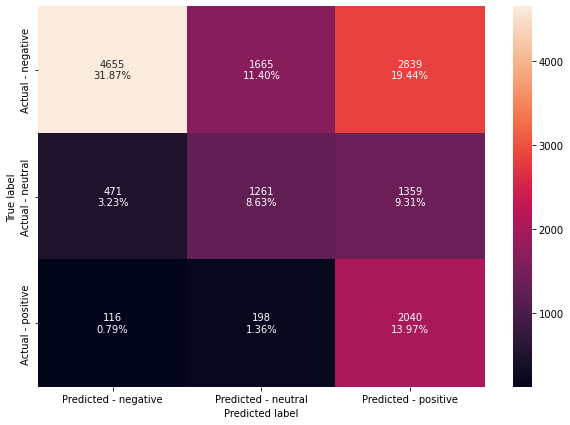

In [150]:
# Print confusion matrix
    
cm_vader=metrics.confusion_matrix(df_unsupervised['airline_sentiment'],df_unsupervised['Vader_polarity'], labels=[1,2,3])

df_cm_vader = pd.DataFrame(cm_vader, index = [i for i in ["Actual - negative","Actual - neutral", "Actual - positive"]],
                  columns = [i for i in ['Predicted - negative','Predicted - neutral', 'Predicted - positive' ]])
group_counts = ["{0:0.0f}".format(value) for value in
                cm_vader.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                         cm_vader.flatten()/np.sum(cm_vader)]
labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_vader, annot=labels,fmt='');
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [151]:
print(classification_report(df_unsupervised['airline_sentiment'],df_unsupervised['Vader_polarity'], labels=[1,2,3]))

              precision    recall  f1-score   support

           1       0.89      0.51      0.65      9159
           2       0.40      0.41      0.41      3091
           3       0.33      0.87      0.47      2354

    accuracy                           0.54     14604
   macro avg       0.54      0.59      0.51     14604
weighted avg       0.70      0.54      0.57     14604



## Using TextBlob

Information on TextBlob 

TextBlob is a python library for Natural Language Processing (NLP).TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. TextBlob is a simple library which supports complex analysis and operations on textual data.

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [152]:
#Calculate the polarity & subjectivity scores of the text field

df_unsupervised['TextBlob_polarity_score']  = df_unsupervised['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

df_unsupervised['TextBlob_subjectivity_score']  = df_unsupervised['text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [153]:
df_unsupervised.sample(20,random_state=1)

,airline_sentiment,text,Vader_polarity_score,Vader_polarity,TextBlob_polarity_score,TextBlob_subjectivity_score
7423,2,jetblue fact chrishasmadeusblush not trend kno...,-0.3724,1,0.3333,0.8333
7684,3,jetblue thank,0.3612,3,0.0000,0.0000
14553,1,americanair tennetexan bad like people team ne...,-0.2500,1,-0.3500,0.3333
1524,1,unite cause riot airplane never see anything like,-0.6917,1,0.0000,0.0000
11868,1,usairways almost hours coin understand higher ...,-0.4588,1,0.2500,0.5000
663,3,unite private jet would cool not work try,0.3182,3,0.1750,0.5125
8244,3,jetblue although not totally answer look appre...,0.4522,3,0.0000,0.7500
10977,2,usairways follow,0.0000,2,0.0000,0.0000
12688,3,americanair thank,0.3612,3,0.0000,0.0000
13359,1,americanair call morning change name upcoming ...,-0.2411,1,-0.2500,0.6250


In [154]:
#Classify the class of the review by keeping threshold on the polarity score

def calc_polarity_score(score):
  if score > 0:
      return 3
  elif score < 0:
      return 1
  else:
      return 2

df_unsupervised['TextBlob_polarity']  = df_unsupervised['TextBlob_polarity_score'].apply(calc_polarity_score)


In [155]:
df_unsupervised.sample(20,random_state=1)

,airline_sentiment,text,Vader_polarity_score,Vader_polarity,TextBlob_polarity_score,TextBlob_subjectivity_score,TextBlob_polarity
7423,2,jetblue fact chrishasmadeusblush not trend kno...,-0.3724,1,0.3333,0.8333,3
7684,3,jetblue thank,0.3612,3,0.0000,0.0000,2
14553,1,americanair tennetexan bad like people team ne...,-0.2500,1,-0.3500,0.3333,1
1524,1,unite cause riot airplane never see anything like,-0.6917,1,0.0000,0.0000,2
11868,1,usairways almost hours coin understand higher ...,-0.4588,1,0.2500,0.5000,3
663,3,unite private jet would cool not work try,0.3182,3,0.1750,0.5125,3
8244,3,jetblue although not totally answer look appre...,0.4522,3,0.0000,0.7500,2
10977,2,usairways follow,0.0000,2,0.0000,0.0000,2
12688,3,americanair thank,0.3612,3,0.0000,0.0000,2
13359,1,americanair call morning change name upcoming ...,-0.2411,1,-0.2500,0.6250,1


For TextBlog, if the polarity is >0, it is considered positive, <0 -is considered negative and ==0 is considered neutral. For vader sentiments, this is based on the compound score. Then you train the classifier based on your sentiments (positive, negative, neutral) and proceed with prediction.

In [156]:
#Calculate the accuracy of the Vader Sentiment Analysis

print("Accuaracy of using Text Blob Sentiment Analysis is : ",
      accuracy_score(df_unsupervised['airline_sentiment'],df_unsupervised['TextBlob_polarity']))

Accuaracy of using Text Blob Sentiment Analysis is :  0.4269378252533552


Text(0.5, 42.0, 'Predicted label')

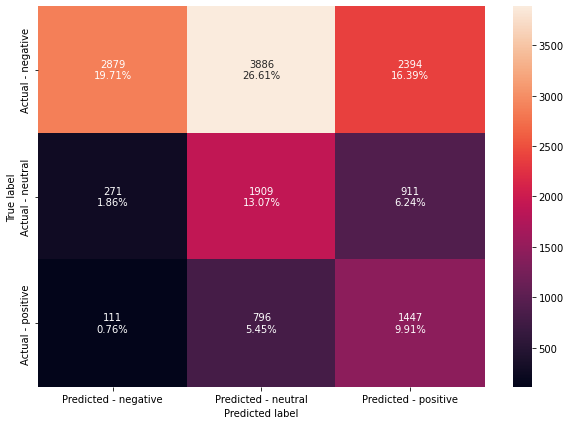

In [157]:
# Function to create confusion matrix for TEST
    
cm_textblob=metrics.confusion_matrix(df_unsupervised['airline_sentiment'].tolist(),df_unsupervised['TextBlob_polarity'].tolist(), labels=[1,2,3])

df_cm_textblob = pd.DataFrame(cm_textblob, index = [i for i in ["Actual - negative","Actual - neutral", "Actual - positive"]],
                  columns = [i for i in ['Predicted - negative','Predicted - neutral', 'Predicted - positive' ]])
group_counts = ["{0:0.0f}".format(value) for value in
                cm_textblob.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                         cm_textblob.flatten()/np.sum(cm_textblob)]
labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_textblob, annot=labels,fmt='');
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [158]:
print(classification_report(df_unsupervised['airline_sentiment'],df_unsupervised['TextBlob_polarity'], labels=[1,2,3]))

              precision    recall  f1-score   support

           1       0.88      0.31      0.46      9159
           2       0.29      0.62      0.39      3091
           3       0.30      0.61      0.41      2354

    accuracy                           0.43     14604
   macro avg       0.49      0.52      0.42     14604
weighted avg       0.66      0.43      0.44     14604



# 11. <b><font color="blue">Model Performance Evaluation</b>

Below is a summary of all models created - 

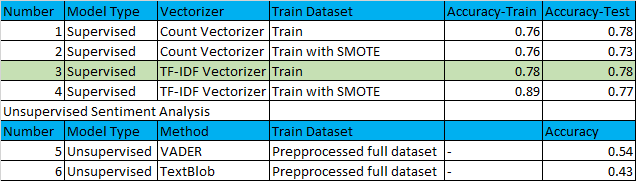

<b> Model 3 is the recommended model. </b>

# 12. <b><font color="blue">Summary</b>

1. Final model provides prediction with 78% accuracy. This model was trained on TF-IDF format data.

2. Dataset - We used original vectorized dataset as well as dataset with oversampled vectorized dataset using SMOTE. Oversampling did not seem to help.

3. Per the RF model with TF-IDF dataset, most prominent sentiment words used were - thank, great, love, awesome, good.

3. Unsupervised lexicon based approaches using VADER and TextBlob were tried as well. These provided predictions with an accuracy of 54% and 43% respectively.

4. Data was preprocessed via several steps / operations to reduce the dimensionality and improve the quality of the dataset before vectorization.

4. Below can be tried for model performance improvement - 
  * Increase the dataset size.
  * Increase number of features in Vectorization, we used only 500 to reduce the training time and model complexity.
  * Expriment with different clssification models, we used Random Forest Classifier, but other classification models (Logistic Regression, Decision Tree, Bagging, Boosting models) can be exprimented with as well.
  * Expriment with Hyperparameter tuning of the models.